In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [2]:
# Read the data from the CSV file
df = pd.read_csv('releases.csv')

In [3]:
df.groupby('Lang').min()

,GoVersion,Released
Lang,,
go1,go1,2012-03-28
go1.1,go1.1,2013-05-13
go1.10,go1.10,2018-02-16
go1.11,go1.11,2018-08-24
go1.12,go1.12,2019-02-25
go1.13,go1.13,2019-09-03
go1.14,go1.14,2020-02-25
go1.15,go1.15,2020-08-11
go1.16,go1.16,2021-02-16


In [4]:
languageVersion = df['Lang'].unique()
firstRelease = df.groupby('Lang').min()['Released']

In [5]:
# parse df['Released'] as date 
# dateStart = pd.to_datetime(df['Released'])
# df['Released'] - df['Lang'].map(firstRelease)
df['diff']= pd.to_datetime(df['Released']) - pd.to_datetime(df['Lang'].map(firstRelease))

In [6]:
df

,Lang,GoVersion,Released,diff
0,go1.24,go1.24.0,2025-02-11,0 days
1,go1.23,go1.23.6,2025-02-04,175 days
2,go1.23,go1.23.5,2025-01-16,156 days
3,go1.23,go1.23.4,2024-12-03,112 days
4,go1.23,go1.23.3,2024-11-06,85 days
...,...,...,...,...
239,go1.1,go1.1,2013-05-13,0 days
240,go1,go1.0.3,2012-09-21,177 days
241,go1,go1.0.2,2012-06-13,77 days
242,go1,go1.0.1,2012-04-25,28 days


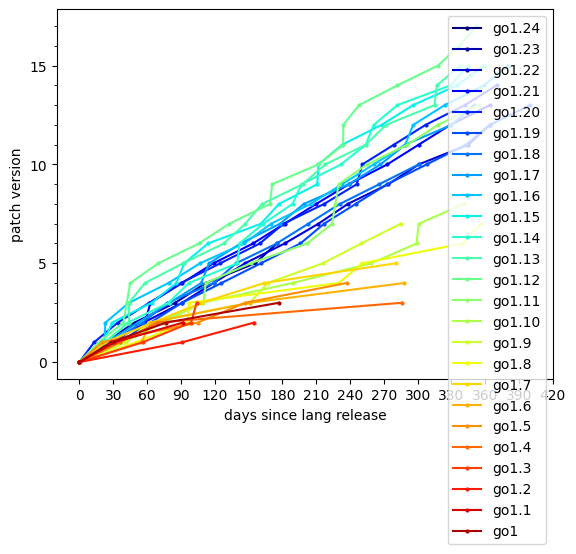

In [7]:
for vi, v in enumerate(languageVersion):
    y = list(reversed(list(range(0, len(df[df["Lang"]==v])))))
    x = df[df["Lang"]==v]["diff"].dt.days
    color = plt.get_cmap("jet")(vi/len(languageVersion))
    plt.plot(x, y, label=v, color=color, marker='o', markersize=2)
plt.ylabel('patch version')
plt.xlabel('days since lang release')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.legend()

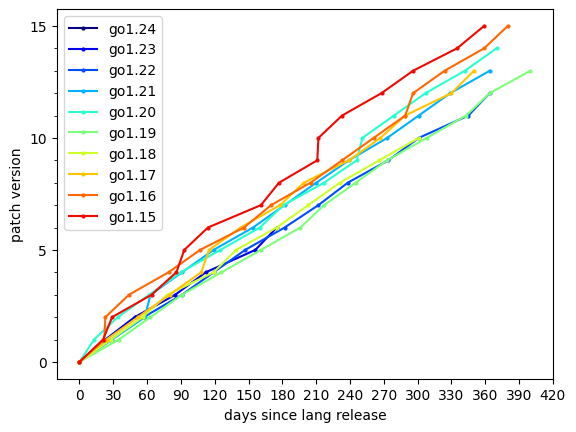

In [8]:
filteredLang = languageVersion[:10]
for vi, v in enumerate(filteredLang):
    y = list(reversed(list(range(0, len(df[df["Lang"]==v])))))
    x = df[df["Lang"]==v]["diff"].dt.days
    color = plt.get_cmap("jet")(vi/len(filteredLang))
    plt.plot(x, y, label=v, color=color, marker='o', markersize=2)
plt.ylabel('patch version')
plt.xlabel('days since lang release')
plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(30))
plt.legend()